<a href="https://colab.research.google.com/github/yblair85/csc302/blob/main/Copy_of_HW5_AODC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

##Q3
Please follow the instructions below and inspect the outputs before you proceed. You can always check this original final to compare your results in your own copy.

In [12]:
# Mount Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import os

# Define the file path to the CSV
file_path = "/content/drive/MyDrive/DATA/house_prices.csv"

# Check if the file exists before reading
if os.path.exists(file_path):
    # Load the CSV file into a pandas DataFrame
    house = pd.read_csv(file_path)
    print("File loaded successfully! Here's a preview of the first few rows:")
    # Display the first few rows of the DataFrame in a clean format
    print(house.head())
else:
    print(f"Error: File not found at {file_path}. Please check the path.")

# Re-load the data again (optional if you need to use it after checking the file existence)
# house = pd.read_csv(file_path)
# Display the first few rows again (to confirm the data)
# print(house.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File loaded successfully! Here's a preview of the first few rows:
   Unnamed: 0        date    state  unemploy_perc  house_price_index  \
0           1  1976-01-01  Alabama            6.7          37.138285   
1           2  1976-02-01  Alabama            6.7          37.756437   
2           3  1976-03-01  Alabama            6.6          38.276319   
3           4  1976-04-01  Alabama            6.5          38.596135   
4           5  1976-05-01  Alabama            6.4          38.740517   

   house_price_perc  
0          0.040405  
1          0.051806  
2          0.059302  
3          0.059585  
4          0.055723  


a) For the states below, please select the rows from the house dataframe, and consider converting the date column to date data type as it may be coming in string format. Then use the head function to preview your new dataframe.

In [13]:

import pandas as pd

# Define the states to filter
states = ['Michigan', 'California', 'Texas', 'Indiana']

# Filter the dataframe for rows where 'state' is one of the specified states
filtered_house = house[house['state'].isin(states)]

# Convert the 'date' column to a datetime type (assuming the column name is 'date')
filtered_house['date'] = pd.to_datetime(filtered_house['date'], errors='coerce')

# Preview the new dataframe
print(filtered_house.head())



      Unnamed: 0       date       state  unemploy_perc  house_price_index  \
2016        2017 1976-01-01  California            9.1          17.908764   
2017        2018 1976-02-01  California            9.1          18.117587   
2018        2019 1976-03-01  California            9.0          18.379530   
2019        2020 1976-04-01  California            9.0          18.673067   
2020        2021 1976-05-01  California            8.9          18.899995   

      house_price_perc  
2016          0.139067  
2017          0.148485  
2018          0.151243  
2019          0.147308  
2020          0.143167  


<ipython-input-13-8791ed31958f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_house['date'] = pd.to_datetime(filtered_house['date'], errors='coerce')


b) Use the FacetGrid from seaborn to create line plots to represent house_price_index for each state. Please make the line color red, set ticks on x axis for years ['1980', '2000', '2020'], which you may have to convert date type again, put those years as labels, and set the titles for each small plot to their state names. In addition, set the y label to 'house price index' and remove the x label since it's obvious that these are years.

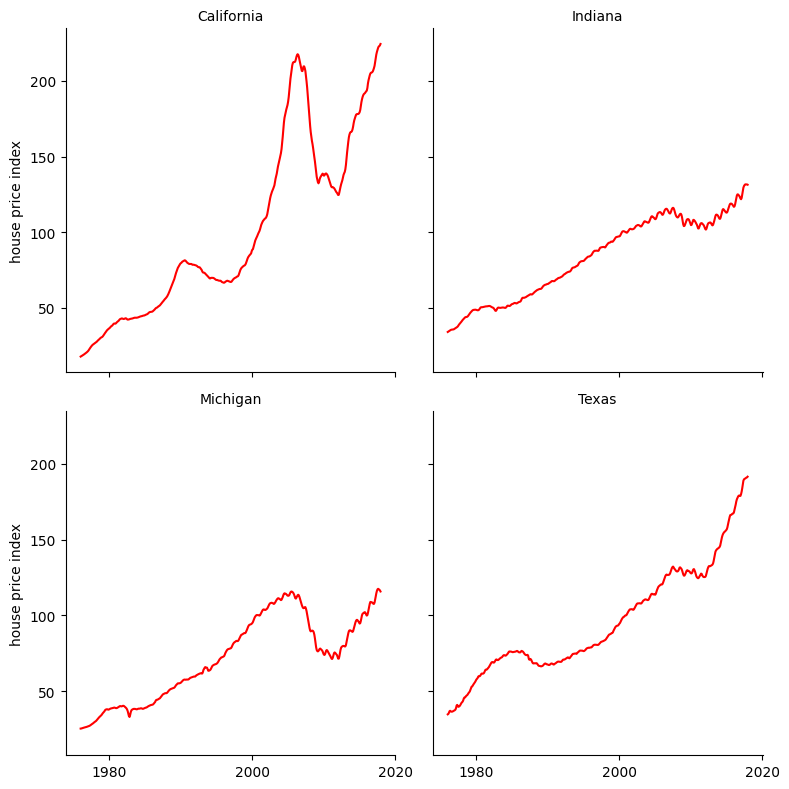

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'date' column to datetime format if not already done
house['date'] = pd.to_datetime(house['date'], errors='coerce')

# Filter the house dataframe for the relevant states
states = ['Michigan', 'California', 'Texas', 'Indiana']
filtered_house = house[house['state'].isin(states)]

# Create the FacetGrid to plot house price index by state
g = sns.FacetGrid(filtered_house, col="state", col_wrap=2, height=4)

# Create line plots for each state with 'date' on the x-axis and 'house_price_index' on the y-axis
g.map(sns.lineplot, "date", "house_price_index", color='red')

# Set the x-axis ticks and labels for each subplot
def set_x_ticks(ax):
    ax.set_xticks(pd.to_datetime(['1980-01-01', '2000-01-01', '2020-01-01']))
    ax.set_xticklabels(['1980', '2000', '2020'])

# Apply the custom function to each axis in the FacetGrid (after plotting)
g.fig.subplots_adjust(hspace=0.4)  # Adjust space between plots
for ax in g.axes.flat:
    set_x_ticks(ax)

# Set labels and titles
g.set_axis_labels("", "house price index")  # Remove x-axis label and set y-axis label
g.set_titles("{col_name}")  # Set title for each subplot to the state name

# Show the plot
plt.tight_layout()
plt.show()


c) Draw a lineplot for 'house price perc', but color them based on the 'state' name which will have four lines in a single plot. Set a legend which will be at the bottom of your graph and have them horizantally positioned next to eachother. Again, set the y label to house_price_perc and remove the x label since it's obvious. (Note that my y label is still showing index. Please ignore that.)

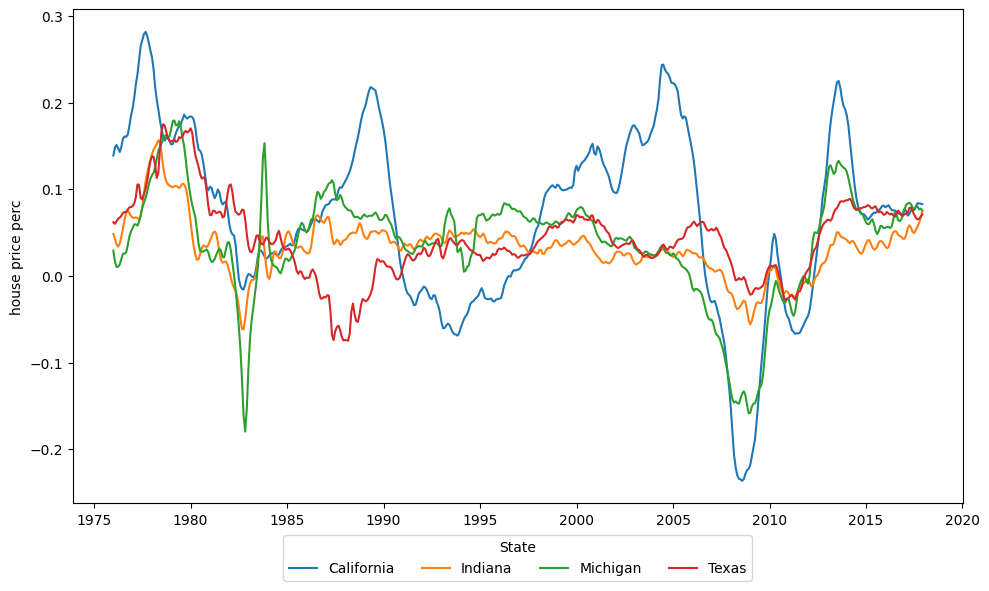

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter the house dataframe for the relevant states
states = ['Michigan', 'California', 'Texas', 'Indiana']
filtered_house = house[house['state'].isin(states)]

# Create the line plot for 'house_price_perc', color by 'state'
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(data=filtered_house, x="date", y="house_price_perc", hue="state", palette="tab10")

# Set the labels and title
plt.ylabel('house price perc')  # Set y label
plt.xlabel('')  # Remove x label since it's obvious

# Set legend to be at the bottom and horizontally positioned
plt.legend(title='State', loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

# Show the plot
plt.tight_layout()
plt.show()

